In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1.Import a 311 NYC service request.

df=pd.read_csv(r'C:\Users\singh\Documents\Data Science using Python Project 1\311_Service_Requests_from_2010_to_Present.csv')

print(df.head())

C:\Users\singh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Side

In [2]:
print(df.shape)

(300698, 53)


In [3]:
print(df.isnull().sum())

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [4]:
print(df.dtypes)

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

import datetime as dt
import datetime, time

df['Created Date'] = pd.to_datetime(df['Created Date'])
print(df['Created Date'].dtype)

datetime64[ns]


In [6]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
print(df['Closed Date'].dtype)

datetime64[ns]


In [7]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
print(df['Request_Closing_Time'].head())

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]


In [9]:
# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
# Conclusion 1: Frequency of each complain type

print(df['Complaint Type'].value_counts())

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64


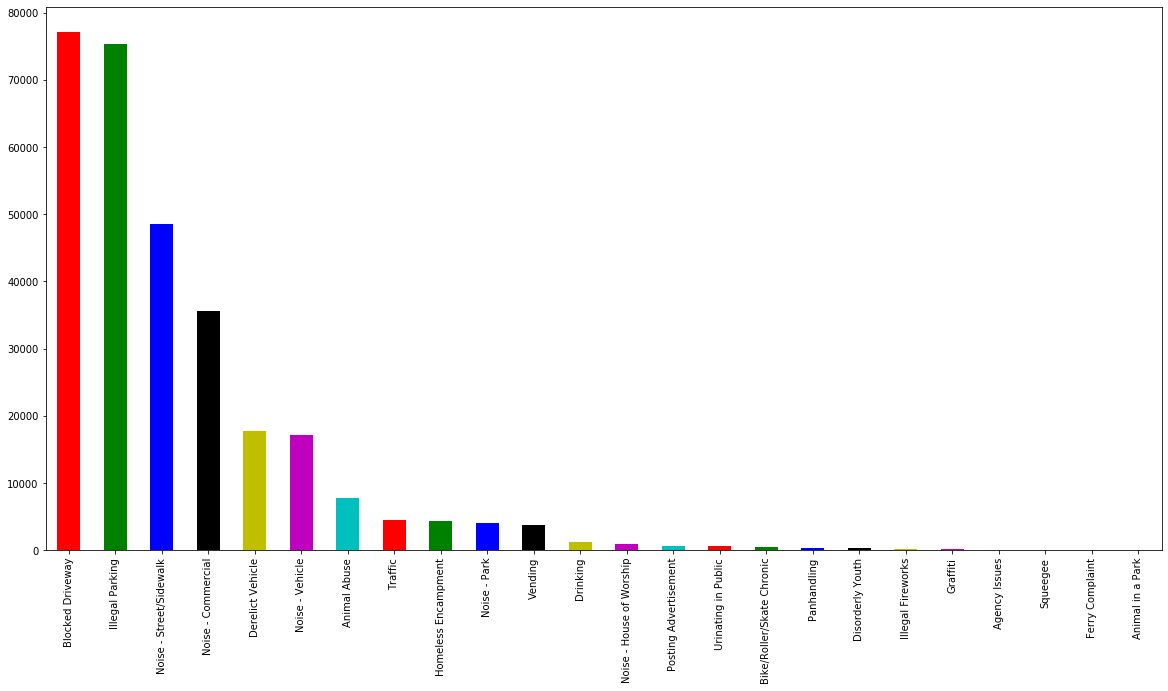

In [10]:
df['Complaint Type'].value_counts().plot(kind="bar", color=list('rgbkymc'), figsize=(20,10))
plt.show()

In [11]:
# Conclusion 2: Status of Complaints 

print(df['Status'].value_counts())

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64


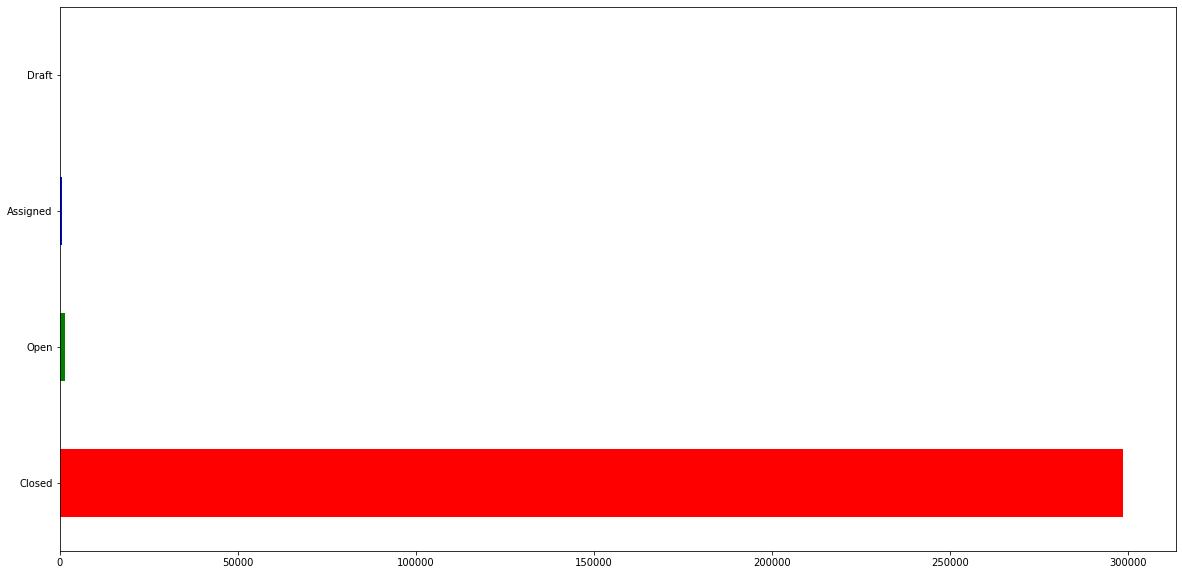

In [12]:
df['Status'].value_counts().plot(kind="barh", color=list('rgbkymc'), figsize=(20,10))
plt.show()

In [13]:
# Conclusion 3: Frequency of complaints from different cities

print(df['City'].value_counts())

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

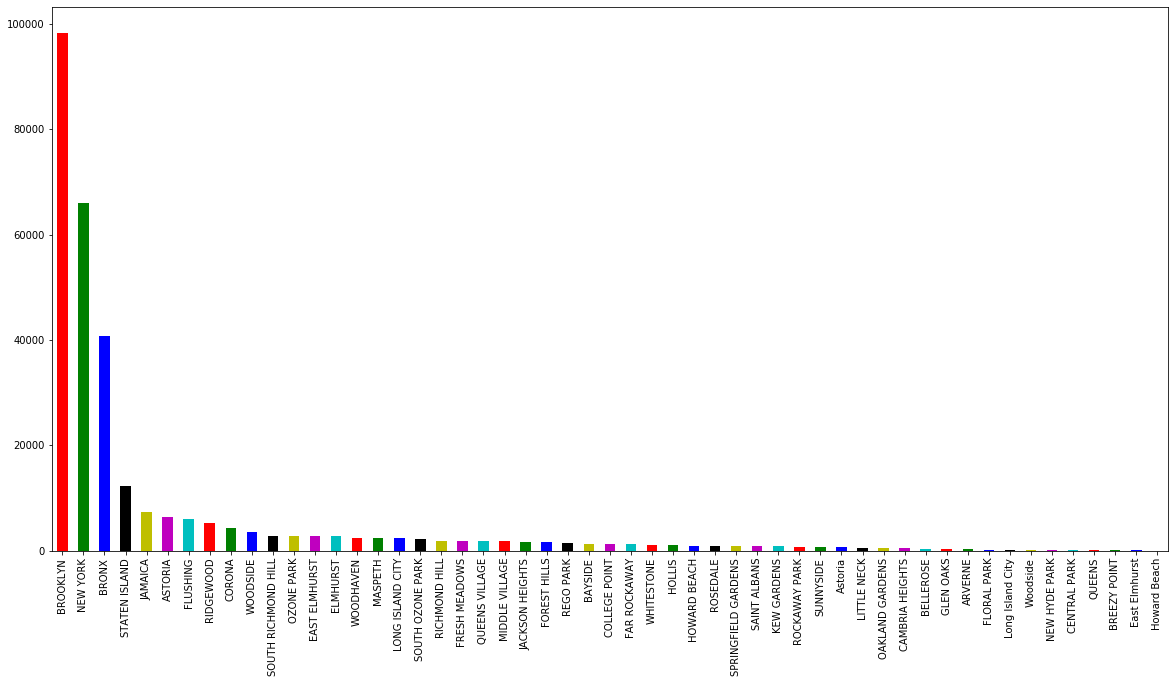

In [14]:
df['City'].value_counts().plot(kind="bar", color=list('rgbkymc'), figsize=(20,10))
plt.show()

In [15]:
# Conclusion 4: 

def toHour(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [16]:
df['Request_Closing_In_Hour'] = df['Request_Closing_Time'].apply(toHour)
print(df['Request_Closing_In_Hour'].head())

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hour, dtype: float64


In [17]:
import math
def hourToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr <= 1.0):
        return 'Excellent'
    elif (hr>1.0 and hr<= 2.0):
        return 'Very Good'
    elif (hr>2.0 and hr<= 4.0):
        return 'Good'
    elif (hr>4.0 and hr<=6.0):
        return 'Average'
    else:
        return 'Poor'
    
df['Request_Closing_Time_Category'] = df['Request_Closing_In_Hour'].apply(hourToCategory)
df['Request_Closing_Time_Category'].head()

0    Excellent
1    Very Good
2      Average
3         Poor
4         Good
Name: Request_Closing_Time_Category, dtype: object

In [18]:
print(df['Request_Closing_Time_Category'].value_counts())

Good           76888
Poor           63197
Very Good      58598
Excellent      57608
Average        42243
Unspecified     2164
Name: Request_Closing_Time_Category, dtype: int64


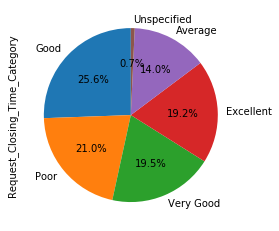

In [19]:
df['Request_Closing_Time_Category'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.show()

In [20]:
# Conclusion 5
months = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(months)
print(months[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [21]:
def getMonth(Date):
    a = str(Date)
    date = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return months[date.month]

In [22]:
df['Created_Month'] = df['Created Date'].apply(getMonth)
print(df['Created_Month'])

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object


In [23]:
print(df['Created_Month'].value_counts())

May    36437
Sep    35427
Jun    35315
Aug    34956
Jul    34888
Oct    32605
Nov    30773
Dec    30521
Apr    27305
Mar     2471
Name: Created_Month, dtype: int64


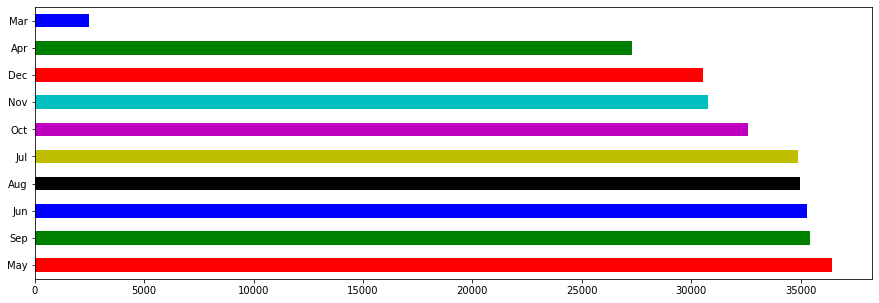

In [24]:
df['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), figsize=(15,5))
plt.show()

In [25]:
# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

print(df['City'].isnull().sum())

2614


In [26]:
df['City'].fillna('NA', inplace=True)

print(df['City'].head())

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object


In [27]:
grouped_df=df.groupby(['City', 'Complaint Type'])

In [28]:
RC_mean = grouped_df.mean()['Request_Closing_In_Hour']
print(RC_mean)

City      Complaint Type         
ARVERNE   Animal Abuse               2.153158
          Blocked Driveway           2.526000
          Derelict Vehicle           2.968889
          Disorderly Youth           3.595000
          Drinking                   0.240000
                                       ...   
Woodside  Blocked Driveway           6.405455
          Derelict Vehicle           4.965000
          Illegal Parking            5.219500
          Noise - Commercial         2.390000
          Noise - Street/Sidewalk    3.410000
Name: Request_Closing_In_Hour, Length: 782, dtype: float64


In [29]:
print(RC_mean.isnull().sum())

4


In [30]:
grouped_df = df.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hour': 'mean'})
print(grouped_df)

                                  Request_Closing_In_Hour
City     Complaint Type                                  
ARVERNE  Animal Abuse                            2.153158
         Blocked Driveway                        2.526000
         Derelict Vehicle                        2.968889
         Disorderly Youth                        3.595000
         Drinking                                0.240000
...                                                   ...
Woodside Blocked Driveway                        6.405455
         Derelict Vehicle                        4.965000
         Illegal Parking                         5.219500
         Noise - Commercial                      2.390000
         Noise - Street/Sidewalk                 3.410000

[782 rows x 1 columns]


In [31]:
print(grouped_df[grouped_df['Request_Closing_In_Hour'].isnull()])

                               Request_Closing_In_Hour
City Complaint Type                                   
NA   Ferry Complaint                               NaN
     Noise - House of Worship                      NaN
     Panhandling                                   NaN
     Posting Advertisement                         NaN


In [32]:
grouped_df=grouped_df.dropna()

In [33]:
print(grouped_df.isnull().sum())

Request_Closing_In_Hour    0
dtype: int64


In [34]:
print(grouped_df)

                                  Request_Closing_In_Hour
City     Complaint Type                                  
ARVERNE  Animal Abuse                            2.153158
         Blocked Driveway                        2.526000
         Derelict Vehicle                        2.968889
         Disorderly Youth                        3.595000
         Drinking                                0.240000
...                                                   ...
Woodside Blocked Driveway                        6.405455
         Derelict Vehicle                        4.965000
         Illegal Parking                         5.219500
         Noise - Commercial                      2.390000
         Noise - Street/Sidewalk                 3.410000

[778 rows x 1 columns]


In [35]:
df2=grouped_df.sort_values(['City', 'Request_Closing_In_Hour'])
print(df2)

                                  Request_Closing_In_Hour
City     Complaint Type                                  
ARVERNE  Drinking                                0.240000
         Vending                                 0.480000
         Urinating in Public                     0.690000
         Panhandling                             1.030000
         Noise - Park                            1.285000
...                                                   ...
Woodside Noise - Commercial                      2.390000
         Noise - Street/Sidewalk                 3.410000
         Derelict Vehicle                        4.965000
         Illegal Parking                         5.219500
         Blocked Driveway                        6.405455

[778 rows x 1 columns]


In [36]:
#5. Perform a statistical test for the following:
#Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

#Whether the average response time across complaint types is similar or not (overall)
#Are the type of complaint or service requested and location related?

import scipy.stats as stats

# Since we have to compare average of more than two variables. Therefore, we use ANOVA for Part 1 - #Whether the average response time across complaint types is similar or not (overall)

# Null hypothesis H0 : All Complain Types average response time mean is similar
# Alternate hypothesis H1 : All Complain Types average response time mean is Not similar

print(df['Complaint Type'].value_counts())

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64


In [37]:
top_complaints_type = df['Complaint Type'].value_counts()[:5]
print(top_complaints_type)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64


In [38]:
top_complaints_type_names = top_complaints_type.index
print(top_complaints_type_names)

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')


In [39]:
sample = df.loc[df['Complaint Type'].isin(top_complaints_type_names), ['Complaint Type', 'Request_Closing_In_Hour']]
print(sample.head())

            Complaint Type  Request_Closing_In_Hour
0  Noise - Street/Sidewalk                     0.92
1         Blocked Driveway                     1.44
2         Blocked Driveway                     4.86
3          Illegal Parking                     7.75
4          Illegal Parking                     3.45


In [40]:
print(sample.shape)

(254312, 2)


In [41]:
sample.dropna(inplace=True)

In [42]:
print(sample.isnull().sum())

Complaint Type             0
Request_Closing_In_Hour    0
dtype: int64


In [43]:
set1 = sample[sample['Complaint Type'] == top_complaints_type_names[1]].Request_Closing_In_Hour
print(set1.head())

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hour, dtype: float64


In [44]:
set2 = sample[sample['Complaint Type'] == top_complaints_type_names[2]].Request_Closing_In_Hour
print(set2.head())

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hour, dtype: float64


In [45]:
set3 = sample[sample['Complaint Type'] == top_complaints_type_names[3]].Request_Closing_In_Hour
print(set3.head())

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hour, dtype: float64


In [46]:
set4 = sample[sample['Complaint Type'] == top_complaints_type_names[4]].Request_Closing_In_Hour
print(set4.head())


14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_In_Hour, dtype: float64


In [48]:
set5 = sample[sample['Complaint Type'] == top_complaints_type_names[0]].Request_Closing_In_Hour
print(set5.head())

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hour, dtype: float64


In [50]:
stat,pvalue=stats.f_oneway(set1, set2, set3, set4, set5)
print(stat,pvalue)

1799.5986832389517 0.0


In [51]:
# Since, pvalue<0.05 we reject null hypothesis.
# Therefore, All Complain Types average response time mean is Not similar

if(pvalue<0.05):
    print("""Reject Null Hypothesis.
    All Complain Types average response time mean is Not similar""")
else:
    print("""Accept Null Hypothesis.
    All Complain Types average response time mean is similar """)    

Reject Null Hypothesis.
    All Complain Types average response time mean is Not similar


In [52]:
# Try ChiSquare Test for part2  -  Are the type of complaint or service requested and location related?

# Null Hypothesis H0 : Complain Type and Location is not related
# Alternate Hypothesis H1 : Complain Type and Location is related

from scipy.stats import chi2_contingency
top_location = df['City'].value_counts()[:5]
print(top_location)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64


In [53]:
top_location_names = top_location.index
print(top_location_names)

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')


In [54]:
sample2 = df.loc[(df['Complaint Type'].isin(top_complaints_type_names)) & (df['City'].isin(top_location_names)), ['Complaint Type', 'City']]
print(sample2.head())

            Complaint Type      City
0  Noise - Street/Sidewalk  NEW YORK
2         Blocked Driveway     BRONX
3          Illegal Parking     BRONX
5          Illegal Parking  BROOKLYN
6          Illegal Parking  NEW YORK


In [55]:
C_table=pd.crosstab(sample2['Complaint Type'], sample2['City'])
print(C_table)

City                     BRONX  BROOKLYN  JAMAICA  NEW YORK  STATEN ISLAND
Complaint Type                                                            
Blocked Driveway         12755     28148     2818      2072           2142
Derelict Vehicle          1953      5181      954       537           1766
Illegal Parking           7859     27462     1421     12128           4886
Noise - Commercial        2434     11463      429     14550            678
Noise - Street/Sidewalk   8892     13356      339     20433            819


In [57]:
ch2, p, dof, tb1 = chi2_contingency(C_table)
print(ch2)
print(p)
print(dof)
print(tb1)

40522.79928349593
0.0
16
[[ 8759.46060116 22125.43658175  1540.58786899 12849.86224559
   2659.65270252]
 [ 1898.81203936  4796.19091522   333.95741205  2785.49950128
    576.54013209]
 [ 9823.16812508 24812.24510042  1727.6695835  14410.28882599
   2982.62836501]
 [ 5400.58618143 13641.28825987   949.83902952  7922.49564631
   1639.79088287]
 [ 8010.97305297 20234.83914274  1408.94610594 11751.85378083
   2432.38791751]]


In [58]:
# Since, p<0.05 we reject null hypothesis.
# Therefore, Complain Type and Location is related

if(pvalue<0.05):
    print("""Reject Null Hypothesis.
    Complain Type and Location is related""")
else:
    print("""Accept Null Hypothesis.
     Complain Type and Location is not related""")

Reject Null Hypothesis.
    Complain Type and Location is related
